In [81]:
import scipy.io as sio
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bmm import *
from lda import *
import pandas
from cw2 import sorted_barplot

In [82]:
np.random.seed(0)
# load data
data = sio.loadmat('kos_doc_data.mat')
# Array containing the training
A = data['A']
N_1 = A.shape[0]
# Training
B= data['B']
V= data['V']
N_2 = B.shape[0]
W = np.max([np.max(A[:, 1]), np.max(B[:, 1])]) # number of uniquie words
start = np.min([np.min(A[:, 1]), np.min(B[:, 1])])
D = np.max(A[:, 0]) # number of documents
N_w = np.sum(A,0)[2]

In [83]:
def sorted_word(mlm, word_ids,M):
    """e
    """
    W = len(mlm)
    xx = np.linspace(0, M, M)
    plt.figure(figsize=(20, 20))
    sorted_indices = np.argsort(mlm,0)
    sorted_names = word_ids[sorted_indices]
    plt.barh(xx, mlm[sorted_indices[-M:]])
    plt.yticks(np.linspace(0, M, M), labels=sorted_names[-M:][:,0])
    plt.ylim([-2, M+2])
    plt.xlabel('Word Probability')
    plt.ylabel('Words')
    plt.show()
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('legend', fontsize='xx-large')
    
    plt.figure(figsize=(20, 20))
    plt.plot(mlm[sorted_indices[::-1]],'x')
    plt.ylabel('Word Probability')
    plt.xlabel('Order')
    plt.show()
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    
    

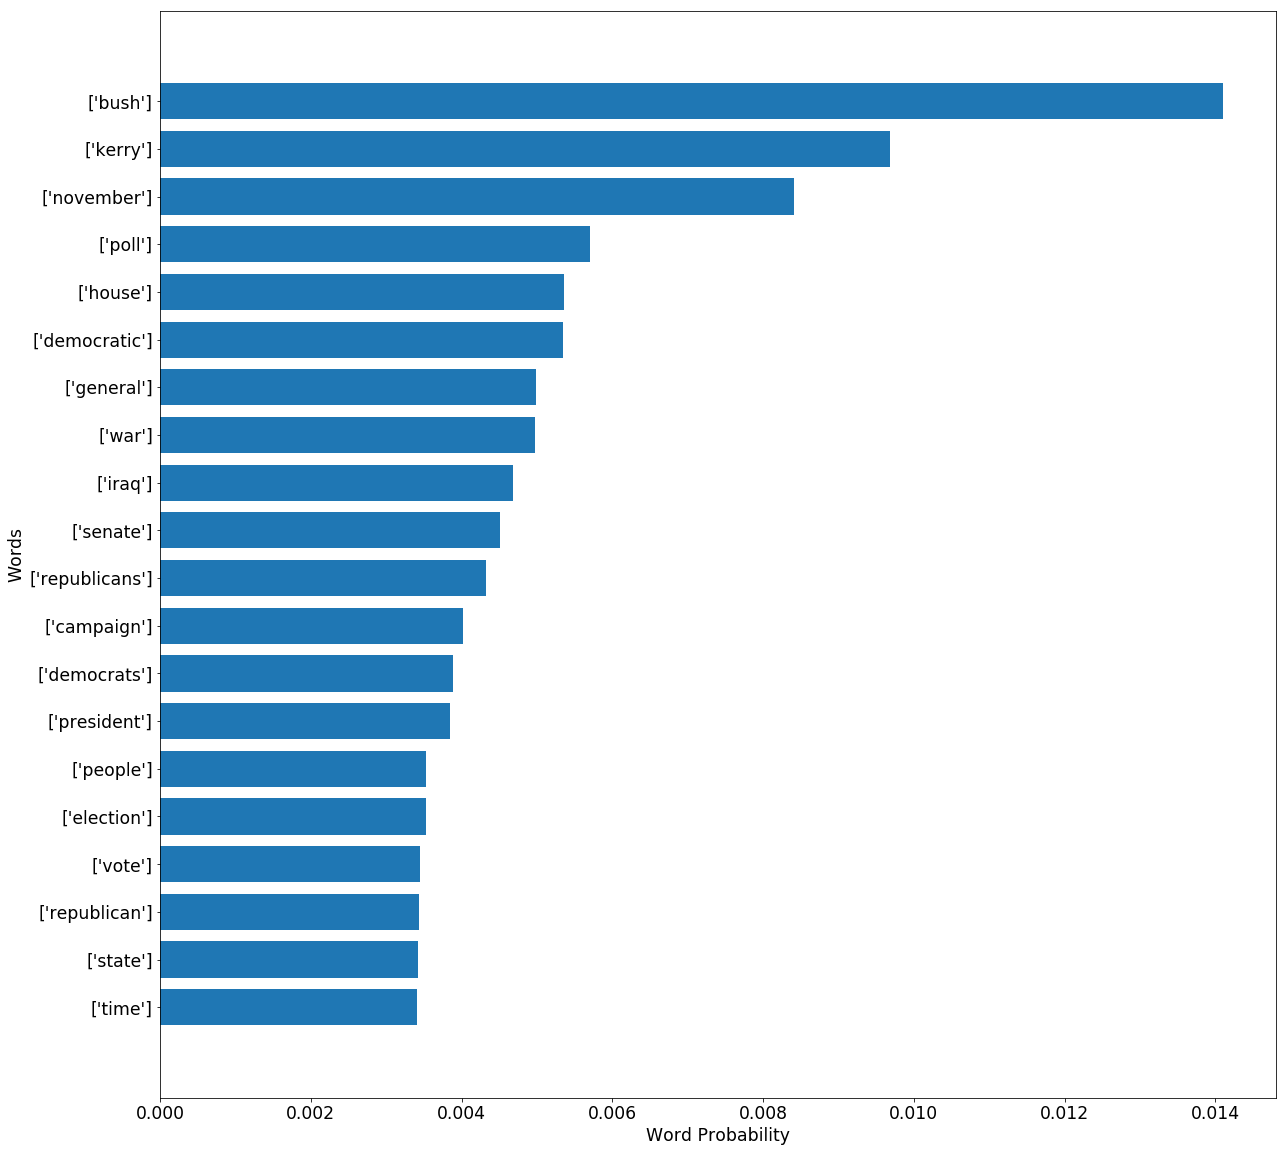

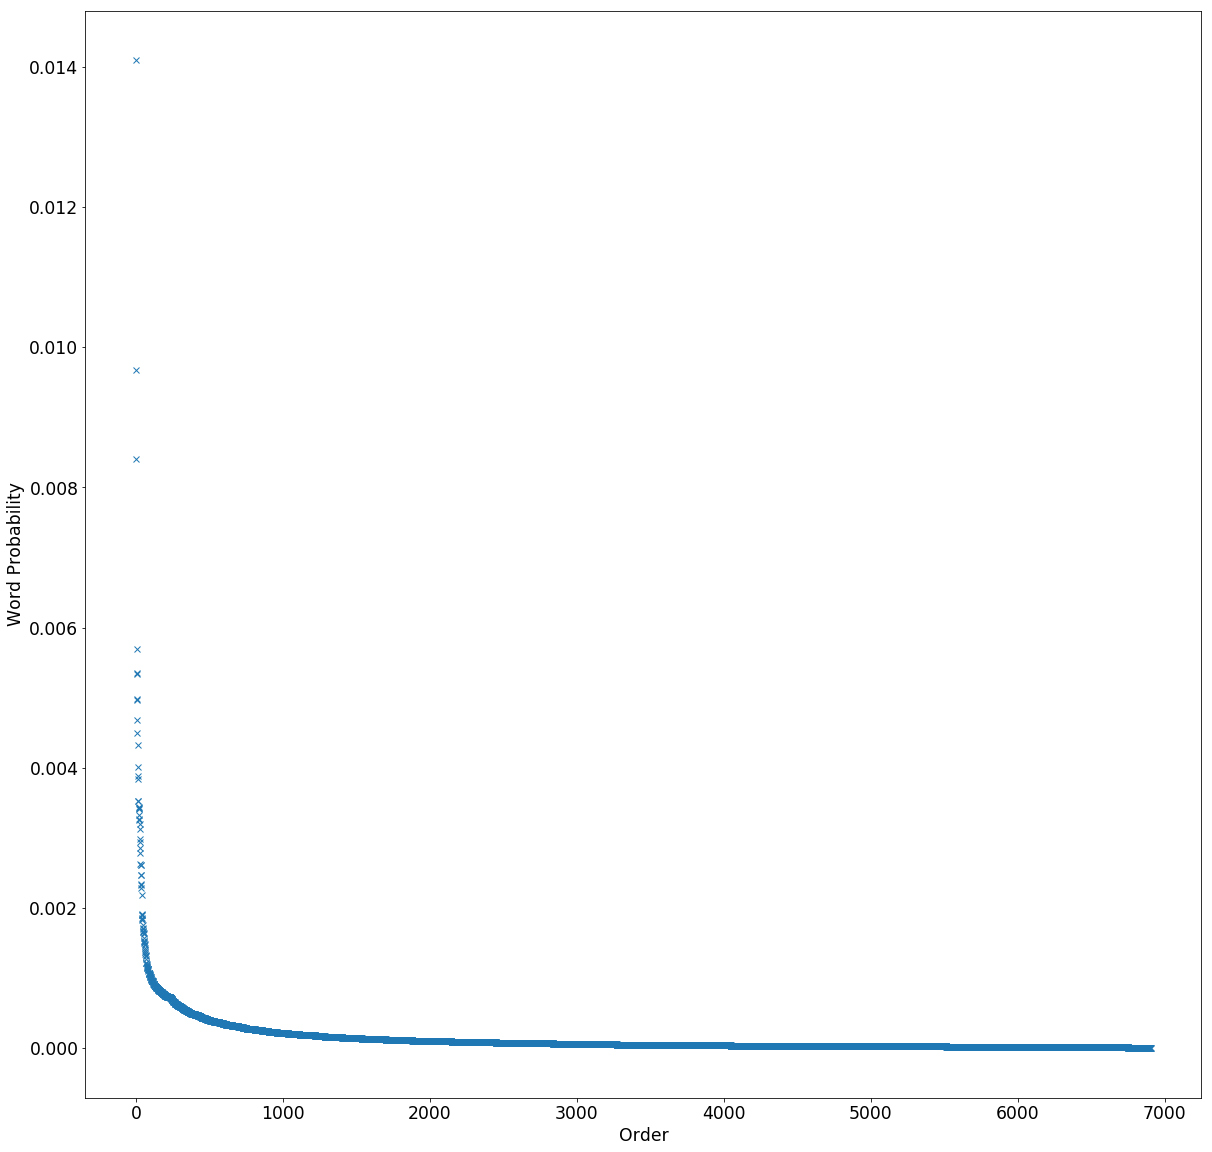

In [84]:
# Find the maxium liklihood moninomial
#print(A) #ids start at 1
mlm = np.zeros(W)
counts=np.zeros(W)
for i in range(N_1):
    counts[A[i,1]-1]+=A[i,2]
mlm = counts/N_w
word_ids = np.linspace(start,W,W,dtype = int)

M=20
sorted_word(mlm,V,M)



The symmetric case might be useful, for example, when a Dirichlet prior over components is called for, but there is no prior knowledge favoring one component over another. Since all elements of the parameter vector have the same value, the symmetric Dirichlet distribution can be parametrized by a single scalar value α, called the concentration parameter.[citation needed] In terms of α, the density function has the form

{\displaystyle f(x_{1},\dots ,x_{K-1};\alpha )={\frac {\Gamma (\alpha K)}{\Gamma (\alpha )^{K}}}\prod _{i=1}^{K}x_{i}^{\alpha -1}.}f(x_{1},\dots ,x_{K-1};\alpha )={\frac {\Gamma (\alpha K)}{\Gamma (\alpha )^{K}}}\prod _{i=1}^{K}x_{i}^{\alpha -1}.
When α=1[1], the symmetric Dirichlet distribution is equivalent to a uniform distribution over the open standard (K − 1)-simplex, i.e. it is uniform over all points in its support. This particular distribution is known as the flat Dirichlet distribution. Values of the concentration parameter above 1 prefer variates that are dense, evenly distributed distributions, i.e. all the values within a single sample are similar to each other. Values of the concentration parameter below 1 prefer sparse distributions, i.e. most of the values within a single sample will be close to 0, and the vast majority of the mass will be concentrated in a few of the values.

3833.0


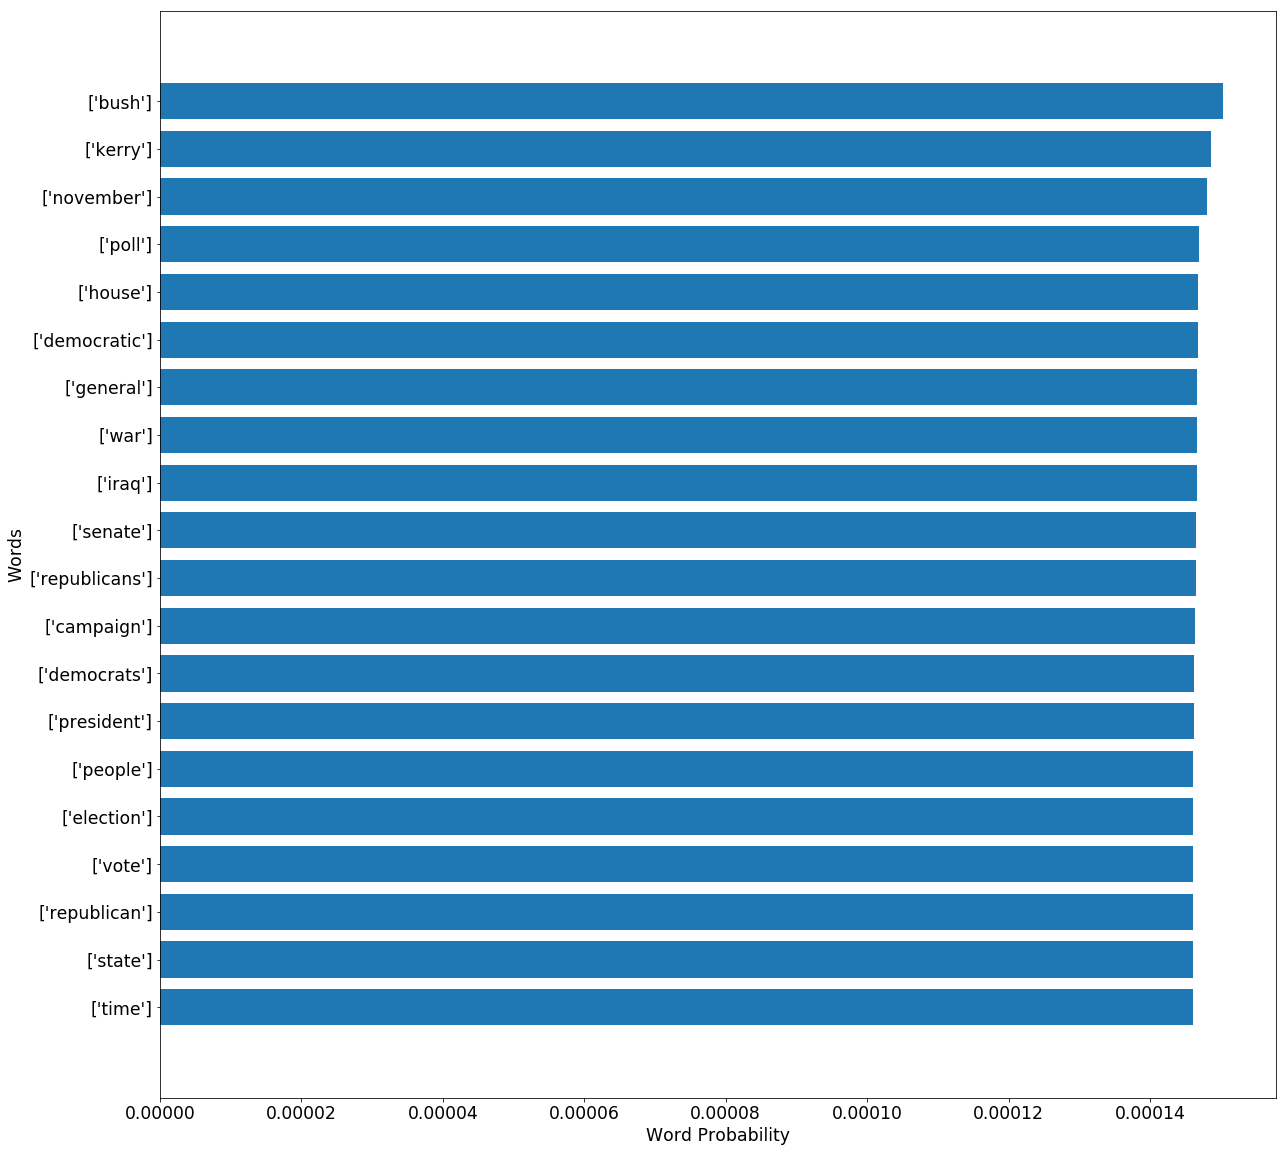

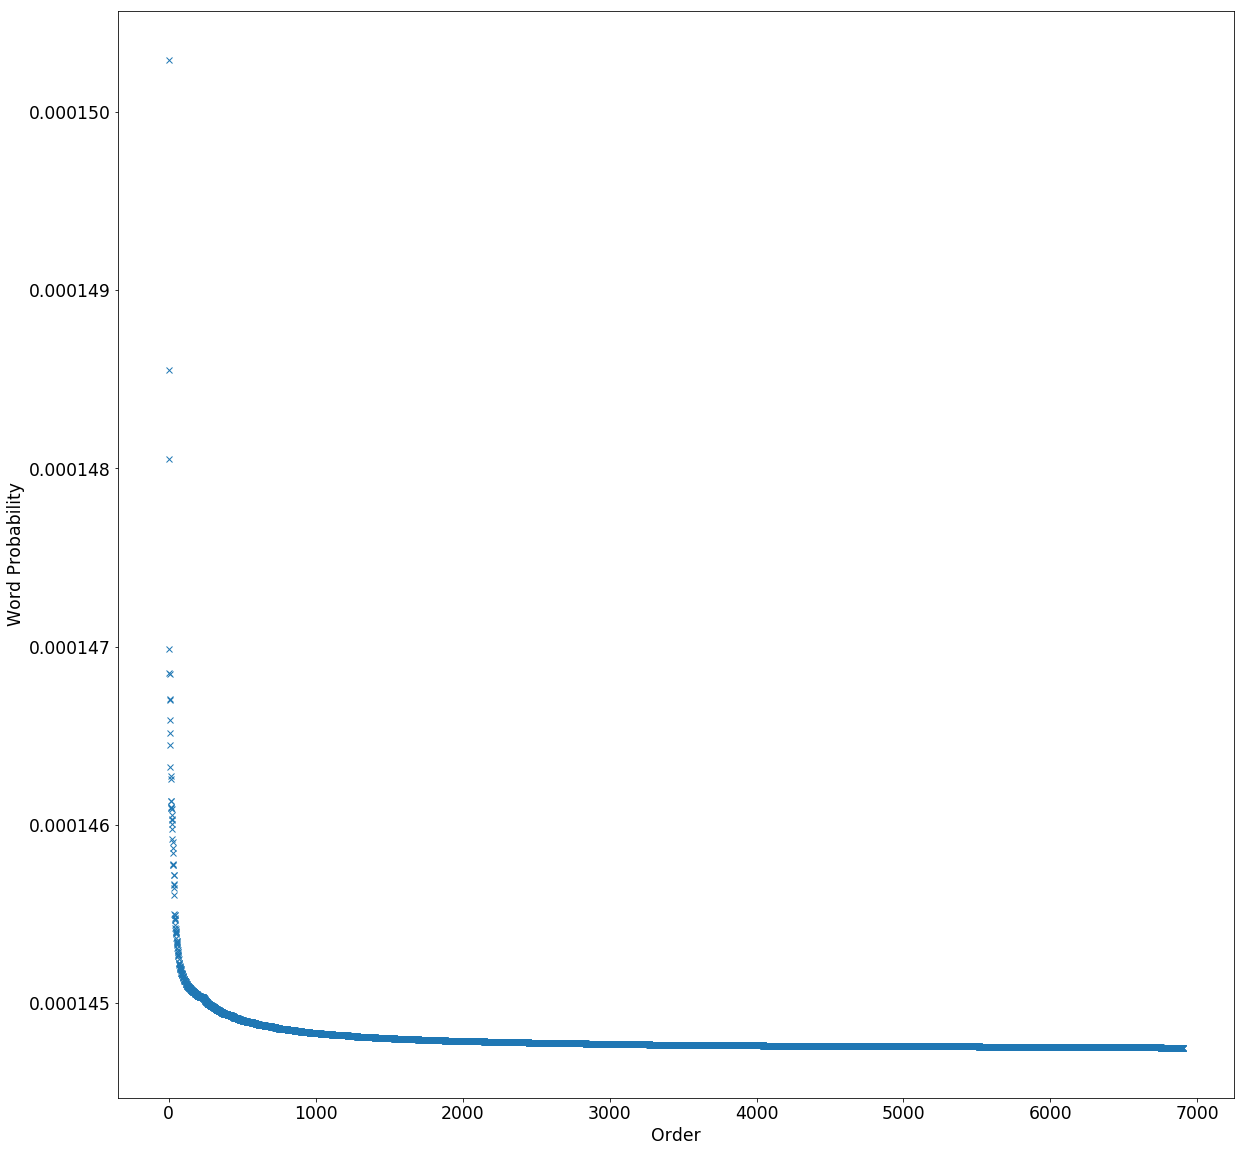

In [85]:
## directio prior 


##update posterior with each alpha value getting that words count added to it
M=20
alpha=100000
print(np.max(counts))
dp = (counts + alpha)/(N_w+W*alpha)
sorted_word(dp,V,M)

In [86]:
def plot_alphas(alphas, word_ids,count):
    """e
    """
    N_w= np.sum(count)
    W = len(count)
    plt.figure(figsize=(20, 20))
    for i in range(len(alphas)):
        mlm = (count + alphas[i])/(N_w+W*alphas[i])      
        W = len(mlm)

        sorted_indices = np.argsort(mlm,0)
        sorted_names = word_ids[sorted_indices]
        plt.plot(mlm[sorted_indices[::-1]],label = 'Alpha = ' + str(alphas[i]))
                
    plt.ylabel('Word Probability')
    plt.xlabel('Order')
    plt.legend()
    plt.show()
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    
    
    plt.figure(figsize=(20, 20))
    for i in range(len(alphas)):
        mlm = (count + alphas[i])/(N_w+W*alphas[i])      
        W = len(mlm)

        sorted_indices = np.argsort(mlm,0)
        sorted_names = word_ids[sorted_indices]
        plt.plot(mlm[sorted_indices[::-1]],label = 'Alpha = ' + str(alphas[i]))
                
    plt.ylabel('Word Probability')
    plt.xlabel('Order')
    plt.legend()
    plt.ylim(0,0.0020)
    plt.show()
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('legend', fontsize='xx-large')    # 

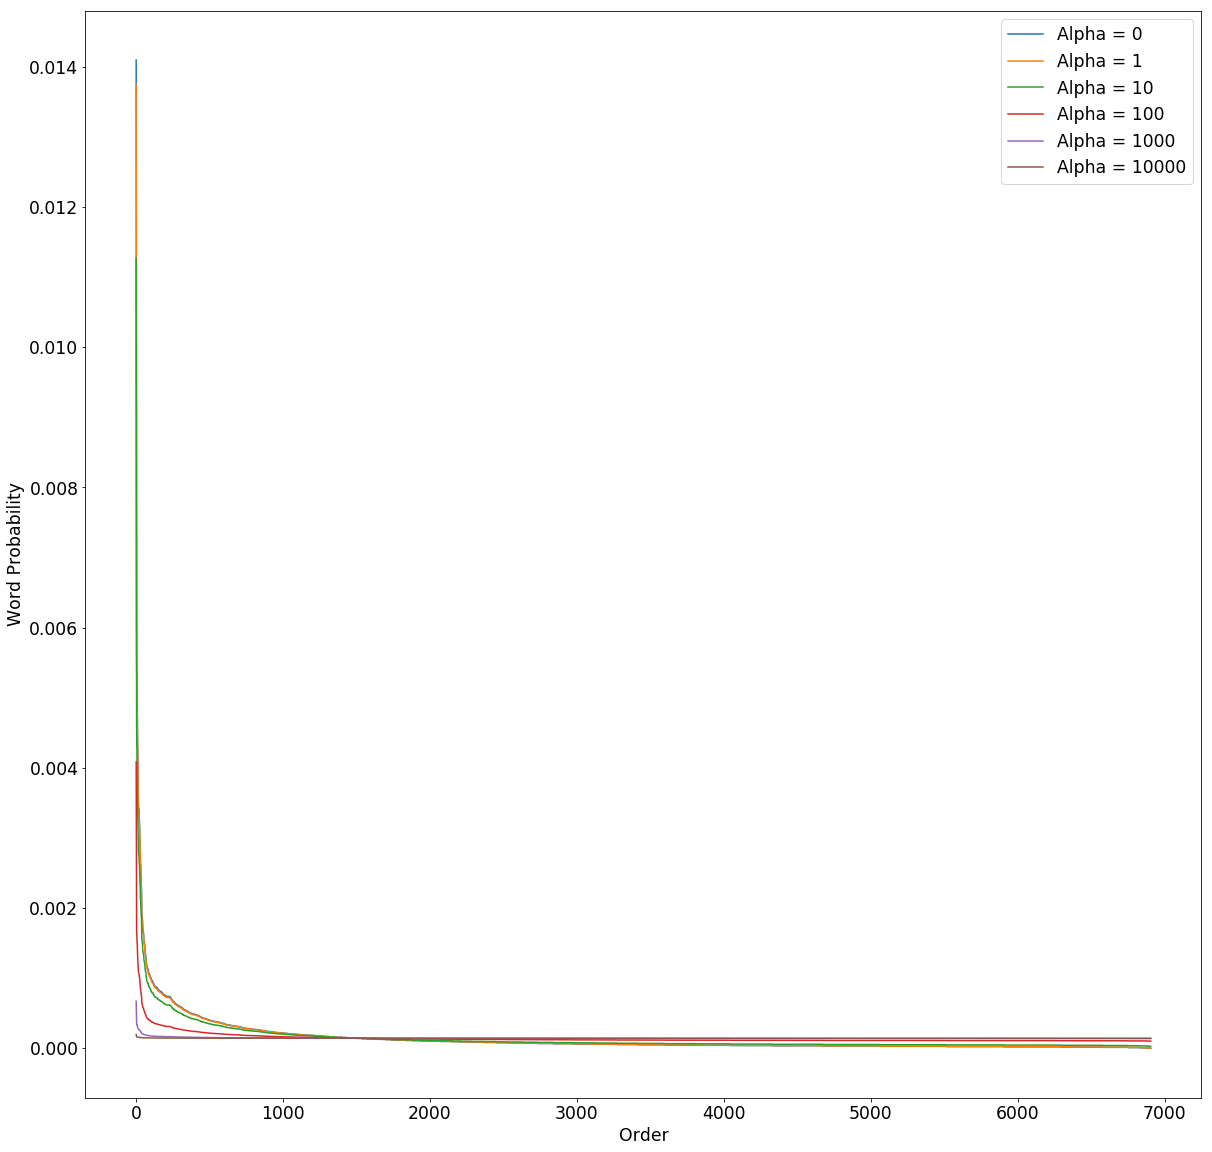

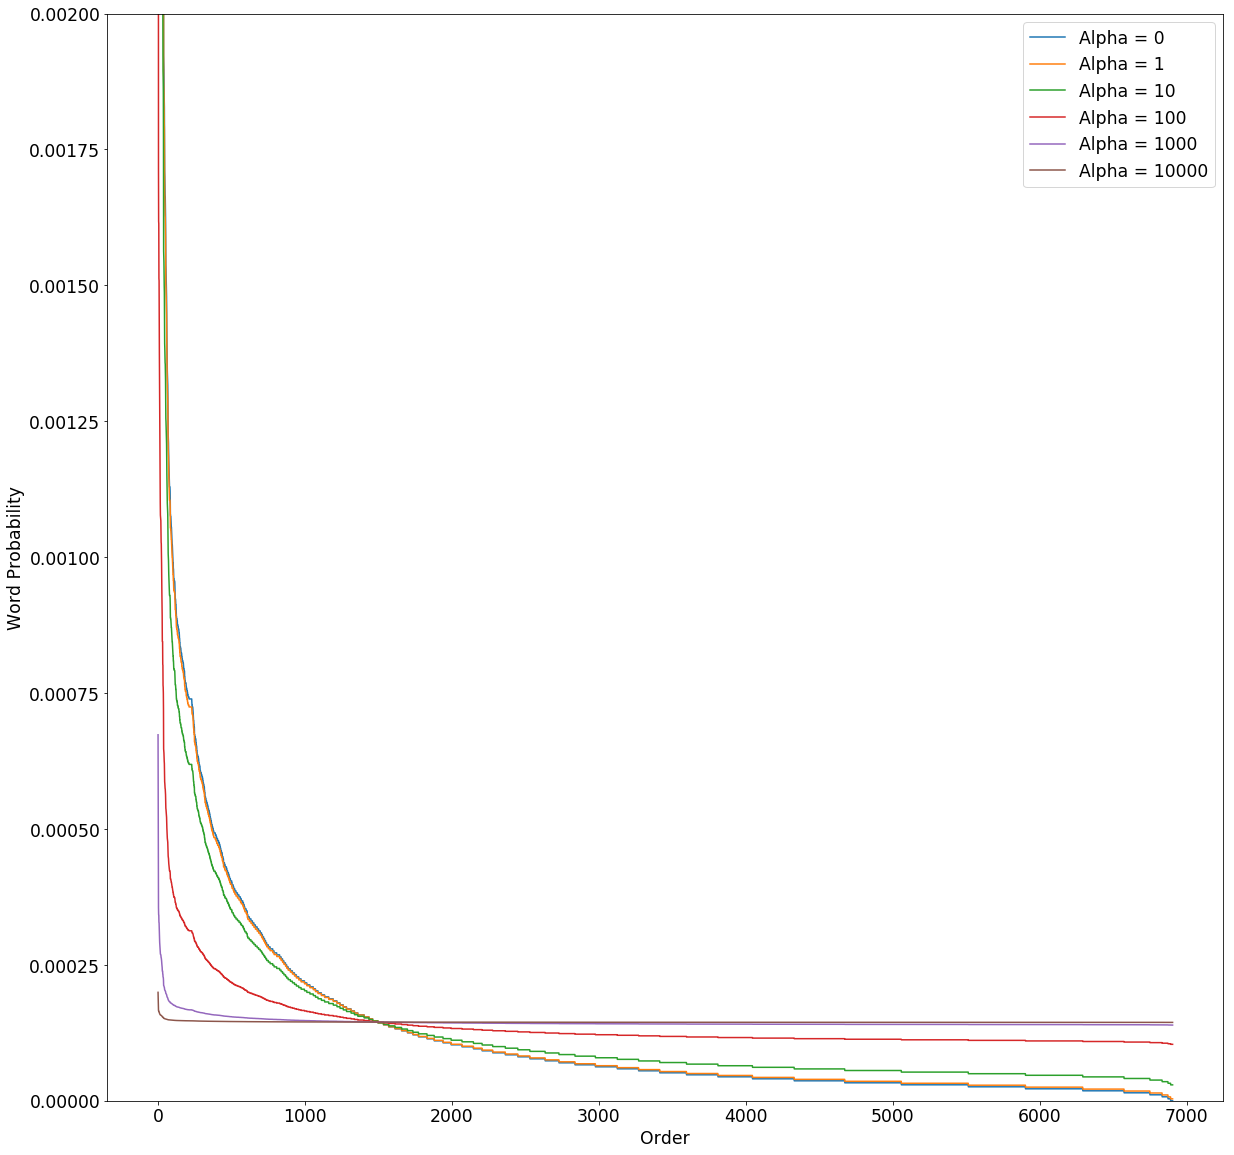

In [97]:
alphas = [0,1,10,100,1000,10000]
plot_alphas(alphas, word_ids,counts)

In [88]:
def log_prob(model, document):
    c = document[:,2]
    log_prob = np.dot(c, np.log(model[document[:,1]-1])) 
    return log_prob
    

In [89]:
def combi_log_prob(model,document):
    c = document[:,2]
    n = np.sum(c)
    factor = np.sum(np.log (np.linspace(1,n,n)) )
    for i in range(len(c)):
        factor -= np.sum(np.log (np.linspace(1,c[i],c[i])) )
                    
    log_prob = np.dot(c, np.log(model[document[:,1]-1])) + factor
    
    return log_prob
#log   n!/c_n!.....


In [90]:
#get document in B with id = 2001
doc_id = 2001
test_indices =  np.where(B[:, 0] == doc_id)
test_document = B[test_indices]

print(log_prob(counts/N_w,test_document))
print(combi_log_prob(counts/N_w,test_document))
# alphas = np.linspace(0,10000,20)
# probs = np.zeros (len(alphas))
# for i in range (len(alphas)):
#     perplexitiy,bm,probs[i] = BMM (A,B[test_indices],1,1,alphas[i])

# plt.plot(alphas,probs)


-3691.544498421646
-1691.1008412738329


In [105]:
#get document in B with id = 2001
doc_id = 2001
test_indices =  np.where(B[:, 0] == doc_id)
test_document = B[test_indices]
alpha = 100
print(log_prob((counts+alpha)/(N_w+W),test_document))
print(combi_log_prob((counts+alpha)/(N_w+W),test_document))
# alphas = np.linspace(0,10000,20)
# probs = np.zeros (len(alphas))
# for i in range (len(alphas)):
#     perplexitiy,bm,probs[i] = BMM (A,B[test_indices],1,1,alphas[i])

# plt.plot(alphas,probs)


-3199.055274667948
-1198.611617520135


In [91]:
alpha = 1
perplexitiy,bm,lp = BMM (A,B,1,1,alpha)
print(perplexitiy)

2683.9840703508507


In [92]:
def get_per(model,document):
    lp = log_prob(model,document)
    n = np.sum(document[:,2])
    return np.exp (-lp/n)

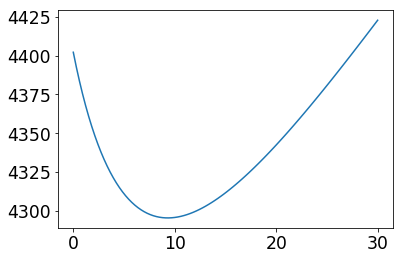

In [93]:
pp =100
alphas = np.linspace(0,30,pp)
perplexities = np.zeros(pp)

doc_id = 2001
test_indices =  np.where(B[:, 0] == doc_id)
test_document = B[test_indices]

for i in range(pp):
    model = (counts + alphas[i])/(N_w+W*alphas[i])
    perplexities[i]= get_per(model,test_document)

plt.plot(alphas, perplexities)

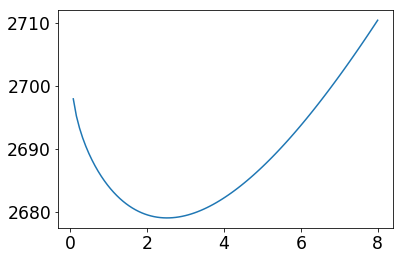

In [94]:
pp =100
alphas = np.linspace(0,8,pp)
perplexities = np.zeros(pp)
log_probs = np.zeros(pp)    
    
unique_docs_in_b = np.unique(B[:, 0])
for doc in unique_docs_in_b:
        test_doc_id = np.where(B[:, 0] == doc)
        #print(test_doc_id)
        test_document = B[test_doc_id]
        c = test_document[:,2]
        for i in range(pp):
            model = (counts + alphas[i])/(N_w+W*alphas[i])
            log_probs[i]+= np.dot(c, np.log(model[test_document[:,1]-1])) 

            
perplexities = np.exp (-log_probs/np.sum(B[:,2]))
plt.plot(alphas, perplexities)


In [95]:
uniform = np.ones(len(counts))/len(counts)
doc_id = 2001
test_indices =  np.where(B[:, 0] == doc_id)
test_document = B[test_indices]

uniform_per = get_per(uniform,test_document)
print(uniform_per)

6906.000000000004


In [96]:
print(np.sum(counts)/N_w)

1.0
